In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

from encoder import load_encoder, encode_data
from decoder import load_decoder, decode_data

import visualization as v

import librosa.display

In [1]:
model_save_path="models/Echoes"
csv_path = 'output/Echoes_output/gtzan_encoded.csv'
encoded_space_dim=128

In [4]:
encoder=load_encoder(f"{model_save_path}/encoder_280.pth", encoded_space_dim=encoded_space_dim)
decoder=load_decoder(f"{model_save_path}/decoder_280.pth", encoded_space_dim=encoded_space_dim)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'device: {device}')

encoder = encoder.to(device)
decoder = decoder.to(device)

/home/chuangyan/Data-Side-of-the-Moon/code/encoder.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.devic

device: cuda


In [5]:
encoded_samples = pd.read_csv(csv_path)
encoded_samples

,enc. v 0,enc. v 1,enc. v 2,enc. v 3,enc. v 4,enc. v 5,enc. v 6,enc. v 7,enc. v 8,enc. v 9,...,enc. v 119,enc. v 120,enc. v 121,enc. v 122,enc. v 123,enc. v 124,enc. v 125,enc. v 126,enc. v 127,label
0,-0.547712,-0.213847,0.060785,-0.216451,0.731972,-0.006007,-0.135720,-0.140588,0.695027,-0.030387,...,-0.120465,-0.365982,0.423422,0.521820,0.416701,-0.026492,-0.399771,0.046480,-1.109472,52635.npy
1,-0.028083,-0.102869,0.420535,-0.544643,0.877177,-0.286636,0.273842,-0.587904,-0.061543,-0.321960,...,-0.949638,-0.227004,-0.008375,0.016797,0.034327,0.060348,0.307535,0.285944,-0.478513,19192.npy
2,-0.018466,0.400346,0.242583,-0.361488,0.516055,0.288970,0.483558,-0.444177,0.119046,-0.181779,...,-0.499797,-0.151201,0.001322,0.259224,-0.094214,-0.256807,0.323226,-0.105210,-0.372494,55076.npy
3,0.114607,-0.235036,-0.422756,-0.202085,0.065973,0.662191,0.827218,-0.335366,0.186521,0.485570,...,-0.483309,-0.069050,0.006874,0.486741,-0.355329,-0.090412,-0.037276,0.563724,-0.472847,133969.npy
4,-0.494619,-0.149178,-0.033392,-0.022157,0.297046,0.139414,0.793314,0.105730,-0.234549,-0.124850,...,-0.815302,-0.041090,0.146227,-0.095882,-0.379217,-0.653050,-0.134621,0.306386,-0.410446,55240.npy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.083873,-0.031765,-0.242106,-0.291358,0.391183,0.385748,0.734140,-0.444881,-0.162056,0.110465,...,-0.041997,-0.496235,-0.086114,0.648987,-0.385312,-0.235957,-0.024681,-0.316632,-0.479606,98301.npy
1594,-0.784081,-0.716051,-0.480199,0.956721,-0.030851,0.560734,0.463433,0.579827,0.518063,-0.537566,...,-0.247150,-0.726943,-0.106405,0.178462,0.361624,-1.082511,0.249228,-0.359513,0.047024,56687.npy
1595,0.077148,0.163023,0.030754,1.045849,-0.193139,0.302504,-0.268748,-0.698257,-0.333044,0.256008,...,-0.309499,-0.488225,0.312137,0.823240,-0.259813,-0.501065,-0.040559,-0.283791,0.443136,43587.npy
1596,0.342106,-0.339053,0.617584,0.243760,0.226275,0.067264,0.109775,-0.025203,-0.239255,-0.419661,...,0.504895,-0.426590,-0.320530,0.346178,0.761440,0.225843,-0.213690,-0.168924,-0.086677,88960.npy


In [6]:
X=encoded_samples.iloc[:, :128]
X

,enc. v 0,enc. v 1,enc. v 2,enc. v 3,enc. v 4,enc. v 5,enc. v 6,enc. v 7,enc. v 8,enc. v 9,...,enc. v 118,enc. v 119,enc. v 120,enc. v 121,enc. v 122,enc. v 123,enc. v 124,enc. v 125,enc. v 126,enc. v 127
0,-0.547712,-0.213847,0.060785,-0.216451,0.731972,-0.006007,-0.135720,-0.140588,0.695027,-0.030387,...,0.637754,-0.120465,-0.365982,0.423422,0.521820,0.416701,-0.026492,-0.399771,0.046480,-1.109472
1,-0.028083,-0.102869,0.420535,-0.544643,0.877177,-0.286636,0.273842,-0.587904,-0.061543,-0.321960,...,0.075585,-0.949638,-0.227004,-0.008375,0.016797,0.034327,0.060348,0.307535,0.285944,-0.478513
2,-0.018466,0.400346,0.242583,-0.361488,0.516055,0.288970,0.483558,-0.444177,0.119046,-0.181779,...,0.283497,-0.499797,-0.151201,0.001322,0.259224,-0.094214,-0.256807,0.323226,-0.105210,-0.372494
3,0.114607,-0.235036,-0.422756,-0.202085,0.065973,0.662191,0.827218,-0.335366,0.186521,0.485570,...,-0.176582,-0.483309,-0.069050,0.006874,0.486741,-0.355329,-0.090412,-0.037276,0.563724,-0.472847
4,-0.494619,-0.149178,-0.033392,-0.022157,0.297046,0.139414,0.793314,0.105730,-0.234549,-0.124850,...,0.154825,-0.815302,-0.041090,0.146227,-0.095882,-0.379217,-0.653050,-0.134621,0.306386,-0.410446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.083873,-0.031765,-0.242106,-0.291358,0.391183,0.385748,0.734140,-0.444881,-0.162056,0.110465,...,0.228003,-0.041997,-0.496235,-0.086114,0.648987,-0.385312,-0.235957,-0.024681,-0.316632,-0.479606
1594,-0.784081,-0.716051,-0.480199,0.956721,-0.030851,0.560734,0.463433,0.579827,0.518063,-0.537566,...,0.314913,-0.247150,-0.726943,-0.106405,0.178462,0.361624,-1.082511,0.249228,-0.359513,0.047024
1595,0.077148,0.163023,0.030754,1.045849,-0.193139,0.302504,-0.268748,-0.698257,-0.333044,0.256008,...,-0.468795,-0.309499,-0.488225,0.312137,0.823240,-0.259813,-0.501065,-0.040559,-0.283791,0.443136
1596,0.342106,-0.339053,0.617584,0.243760,0.226275,0.067264,0.109775,-0.025203,-0.239255,-0.419661,...,0.367463,0.504895,-0.426590,-0.320530,0.346178,0.761440,0.225843,-0.213690,-0.168924,-0.086677


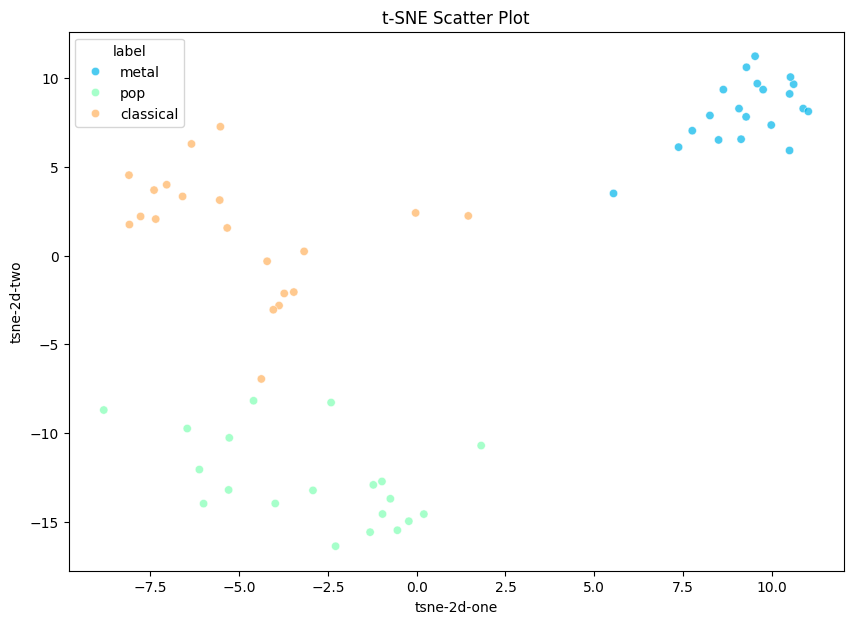

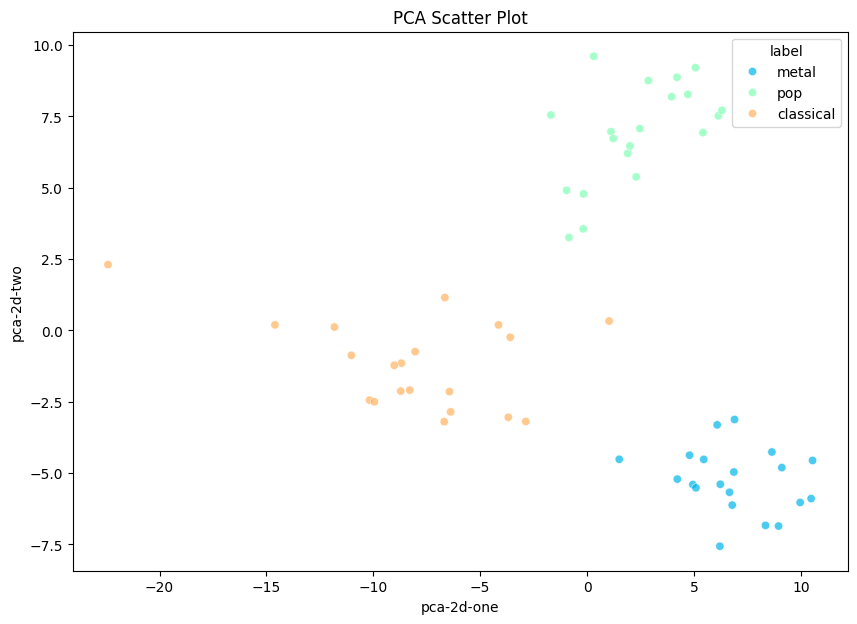

In [6]:
# selected_labels = ['hiphop', 'rock']
# selected_labels = ['blues', 'disco', 'rock', 'metal', 'pop', 'classical', 'reggae', 'country','hiphop','jazz']
selected_labels = ['classical', 'metal', "pop"]
# selected_labels = ['classical', 'reggae']


# plot_original_data(encoded_samples, selected_labels)
v.plot_tsne(encoded_samples, X, selected_labels)
v.plot_pca(encoded_samples, X, selected_labels)

# v.plot_all(encoded_samples, X, selected_labels)

Cluster 0:
label
classical    11
blues         5
jazz          5
country       3
disco         1
Name: count, dtype: int64
Predicted Label: jazz

Cluster 1:
label
country      7
pop          5
reggae       4
rock         4
hiphop       3
disco        2
jazz         2
classical    1
Name: count, dtype: int64
Predicted Label: country

Cluster 2:
label
disco        9
hiphop       8
rock         7
blues        4
reggae       3
jazz         2
classical    2
metal        1
country      1
Name: count, dtype: int64
Predicted Label: disco

Cluster 3:
label
classical    5
Name: count, dtype: int64
Predicted Label: classical

Cluster 4:
label
metal    8
Name: count, dtype: int64
Predicted Label: metal

Cluster 5:
label
hiphop    2
rock      1
pop       1
Name: count, dtype: int64
Predicted Label: hiphop

Cluster 6:
label
pop        14
reggae      7
hiphop      5
jazz        5
disco       4
country     3
rock        1
Name: count, dtype: int64
Predicted Label: pop

Cluster 7:
label
blues        6


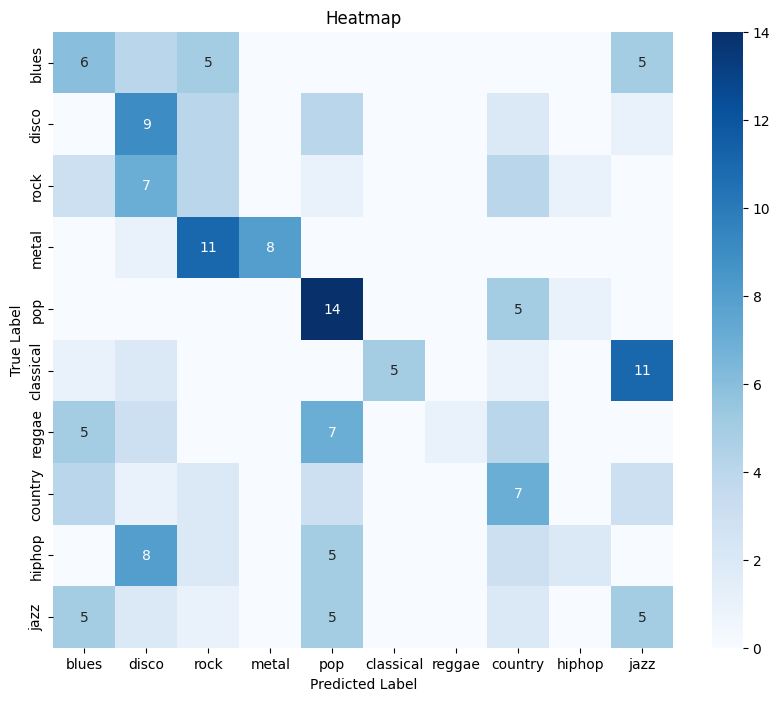

In [7]:
# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用K-means算法
kmeans = KMeans(n_clusters=10, n_init='auto', random_state=0)
kmeans.fit(X_scaled)

encoded_samples['cluster'] = kmeans.labels_

# 获取所有唯一的标签和簇
unique_labels = encoded_samples['label'].unique()
clusters = np.unique(kmeans.labels_)

# 创建一个 DataFrame 来存储每个簇中每个标签的占比
label_proportion = pd.DataFrame(0, index=clusters, columns=unique_labels, dtype=float)

# 计算每个簇中每个标签的占比
for cluster in clusters:
    cluster_labels = encoded_samples[encoded_samples['cluster'] == cluster]['label']
    label_counts = cluster_labels.value_counts(normalize=True)
    for label, proportion in label_counts.items():
        label_proportion.loc[cluster, label] = proportion

# 初始化结果字典
cluster_to_label = {}

# 贪心算法选择标签
remaining_labels = set(unique_labels)
while not label_proportion.empty:
    # 找到当前最大占比
    max_proportion = label_proportion.max().max()
    
    # 找到最大占比对应的簇和标签
    max_cluster, max_label = np.unravel_index(label_proportion.values.argmax(), label_proportion.shape)
    max_cluster = label_proportion.index[max_cluster]
    max_label = label_proportion.columns[max_label]
    
    # 将标签分配给簇
    cluster_to_label[max_cluster] = max_label
    
    # 从矩阵中删除已分配的簇和标签
    label_proportion.drop(index=max_cluster, inplace=True)
    label_proportion.drop(columns=max_label, inplace=True)

# 基于每个数据点的簇标签，生成其预测标签
encoded_samples['predicted_label'] = encoded_samples['cluster'].map(cluster_to_label)

# 打印每个簇中真实标签的分布和预测标签
for cluster in clusters:
    labels_in_cluster = encoded_samples[encoded_samples['cluster'] == cluster]['label']
    label_counts = labels_in_cluster.value_counts()
    predicted_label = cluster_to_label[cluster]
    print(f'Cluster {cluster}:')
    print(label_counts)
    print(f'Predicted Label: {predicted_label}\n')

# 计算混淆矩阵
conf_matrix = confusion_matrix(encoded_samples['label'], encoded_samples['predicted_label'], labels=unique_labels)

# 计算准确度
accuracy = accuracy_score(encoded_samples['label'], encoded_samples['predicted_label'])
print(f'Clustering Accuracy: {accuracy:.2f}')

# 自定义注释文本，仅显示大于等于阈值的数量
threshold = 5
annot = np.where(conf_matrix >= threshold, conf_matrix, '')

# 绘制混淆矩阵并显示数量
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=annot, fmt='', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heatmap')
plt.show()

## Special Song

In [8]:
file_path = "data/spec/testsongs_646/The Doctor (Comfortably Numb) [The Wall, Work In Progress Pt. 2 1979].npy"
special_song=np.load(file_path)

In [9]:
encoded_spectrogram_np=encode_data(encoder, special_song)

In [10]:
encoded_samples_with_new=encoded_samples
# Create a new entry for the new song
special_label = '★★★'
encoded_new_song_entry = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_spectrogram_np)}
encoded_new_song_entry['label'] = special_label

# Convert the dictionary to a DataFrame
encoded_new_song_entry_df = pd.DataFrame([encoded_new_song_entry])

# Append to the dataframe using pd.concat
encoded_samples_with_new = pd.concat([encoded_samples_with_new, encoded_new_song_entry_df], ignore_index=True)

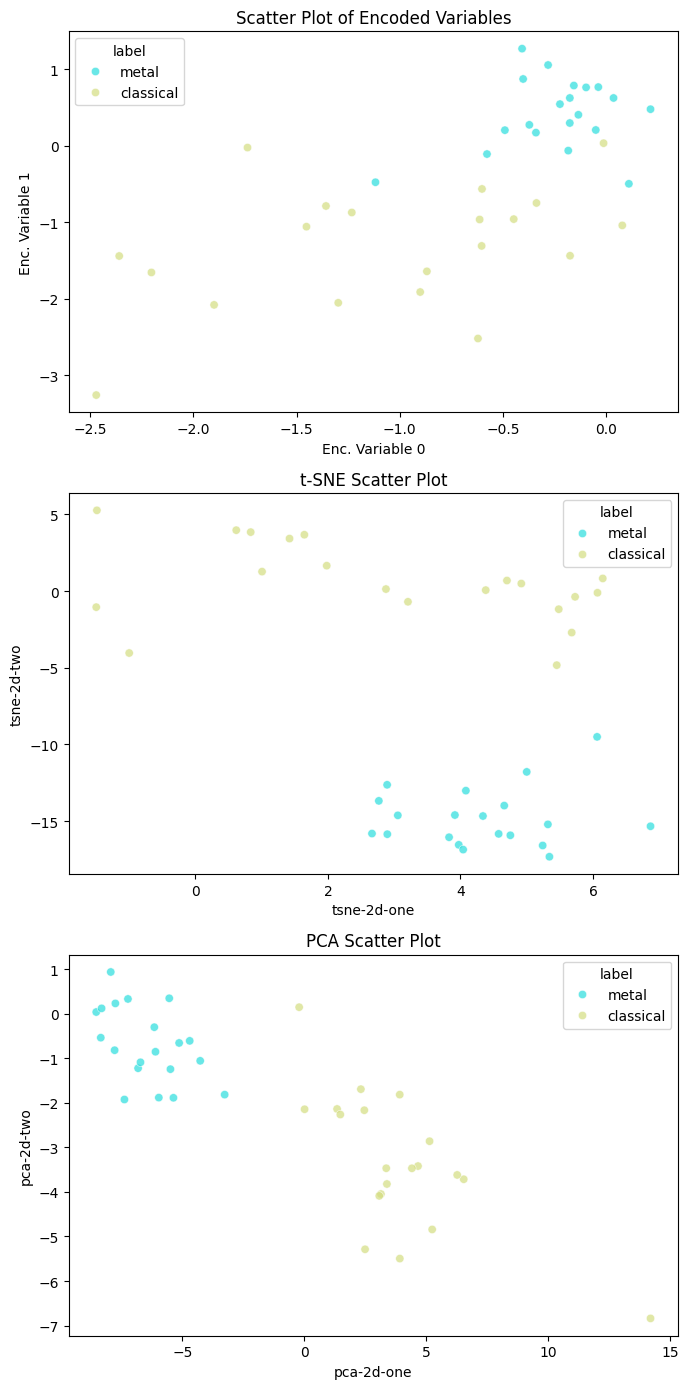

In [11]:
Y=encoded_samples_with_new.iloc[:,:64]
# 选择要展示的标签
# selected_labels = ['classical', 'metal']
# selected_labels = ['country', 'metal']
selected_labels = ['classical', 'metal']
# selected_labels = ['classical', 'pop']
# selected_labels = ['blues', 'disco', 'rock', 'metal', 'pop', 'classical', 'reggae', 'country','hiphop','jazz']
# selected_labels = ['rock', 'classical', special_label]
v.plot_all(encoded_samples_with_new, Y, selected_labels)

## Reconstruction

/home/chuangyan/Data-Side-of-the-Moon/code/encoder.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.devic

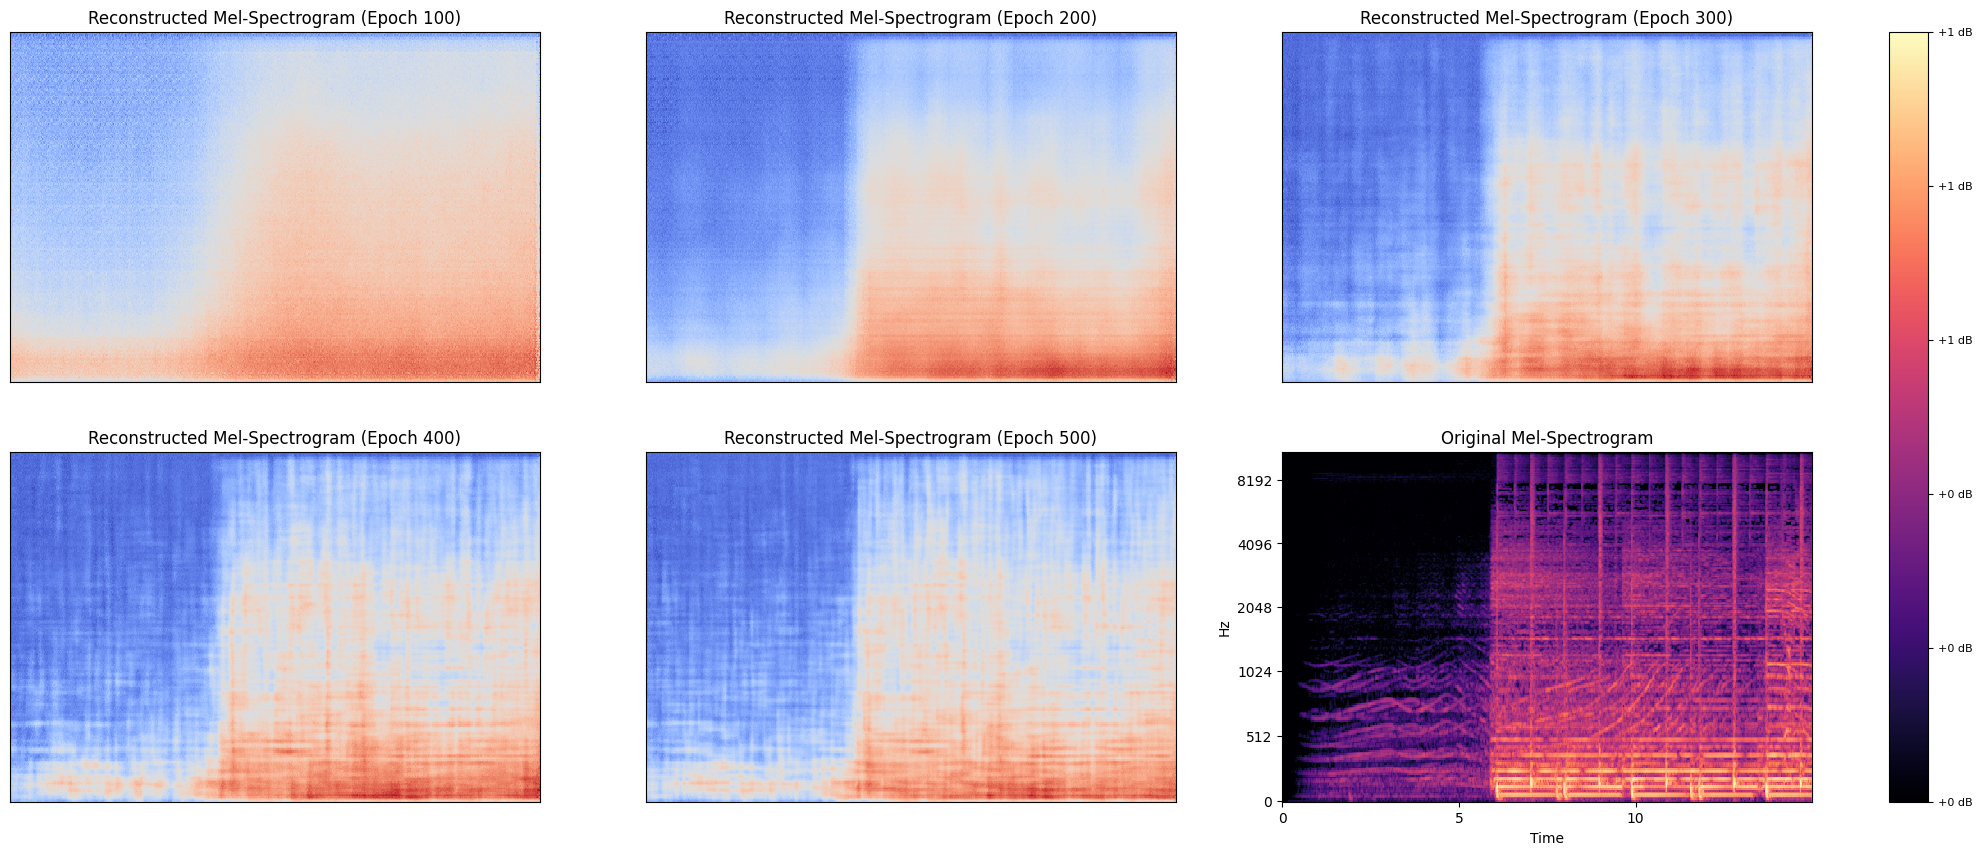

In [7]:
origin = "data/spec/testsongs_646/The Doctor (Comfortably Numb) [The Wall, Work In Progress Pt. 2 1979].npy"
og_song = np.load(origin)
epochs = [100, 200, 300, 400, 500]

# fig, axes = plt.subplots(len(epochs)+1, 1, figsize=(15, 20))

fig, axes = plt.subplots(2, 3, figsize = (25, 10))
axes = axes.flatten()

for i, epoch in enumerate(epochs):
    
    encoder = load_encoder(f"{model_save_path}/encoder_{epoch}.pth", encoded_space_dim=encoded_space_dim)
    decoder = load_decoder(f"{model_save_path}/decoder_{epoch}.pth", encoded_space_dim=encoded_space_dim)
    
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    
    encoder = encoder.to(device)
    decoder = decoder.to(device)
    
    encoded_song = encode_data(encoder, og_song)
    # print(encoded_song.shape)
    recon_song = decode_data(decoder, encoded_song)
    # print(recon_song)
    img = librosa.display.specshow(recon_song, sr = 22050, ax = axes[i])
    axes[i].set_title(f'Reconstructed Mel-Spectrogram (Epoch {epoch})')

# Plot the original mel-spectrogram at the end
img = librosa.display.specshow(og_song, sr = 22050, x_axis='time', y_axis='mel', ax=axes[-1])
axes[-1].set_title('Original Mel-Spectrogram')

# Add colorbar to the last plot
cbar = fig.colorbar(img, ax=axes, format='%+2.0f dB', fraction=0.03, pad=0.04)
cbar.ax.tick_params(labelsize=8)

# plt.tight_layout()
plt.show()

In [13]:
# import sounddevice as sd
# sr = 22050
# y=librosa.feature.inverse.mel_to_audio(og_song)
# sd.play(y, sr)
# status = sd.wait()

In [14]:
# y2=librosa.feature.inverse.mel_to_audio(recon_song)
# sd.play(y2, sr)
# status = sd.wait()